### Simulação de Monte Carlo
##### Autor: Saulo Brendo Alves de Jesus 
##### LinkedIn: linkedin.com/in/saulo-brendo/

### Importação de Biblioteca

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr

### Obtenção de Dados

In [2]:
# Função para obter dados e calcular retorno, média de retorno e matriz de covariância
def get_data(tickers, start, end):
    ticker_data = pdr.get_data_yahoo(tickers, start, end)
    ticker_data =  ticker_data['Close']
    retornos =  ticker_data.pct_change()
    media_retornos = retornos.mean()
    mat_cov = retornos.cov()
    return media_retornos, mat_cov

# Definir os tickers
tickers = ["VTI","VGLT","VGIT","IAU","PDBC","^GSPC"]

# Definir períodos
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=500)

In [3]:
# Obter dados de Média de retorno e Matriz de Covariância
media_retornos, mat_cov = get_data(tickers, startDate, endDate)

In [7]:
# Definir pesos
pesos = np.random.random(len(media_retornos))
pesos /= np.sum(pesos)

### Monte Carlo

In [19]:
# Definir nº de simulações e quantidade de dias
num_sims = 1000
T = 100 

# Vetor para armazenar valores
meanM = np.full(shape = (T, len(pesos)), 
                fill_value = media_retornos)
meanM = meanM.T

In [20]:
# Simulação de Portfólio
portfolio_sims = np.full(shape=(T, num_sims), fill_value=0.0)

# Valor inicial fictício
initialPortfolio = 10000

In [24]:
# Loop de simulação
for m in range(0, num_sims):
    Z = np.random.normal(size=(T, len(pesos)))
    L = np.linalg.cholesky(mat_cov) 
    dailyReturns = meanM + np.inner(L, Z) 
    portfolio_sims[:,m] = np.cumprod(
        np.inner(pesos, 
                 dailyReturns.T) + 1) * initialPortfolio

### Visualização

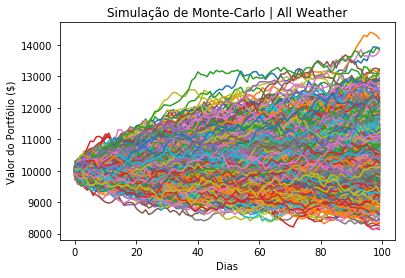

In [25]:
plt.plot(portfolio_sims)
plt.ylabel('Valor do Portfólio ($)')
plt.xlabel('Dias')
plt.title('Simulação de Monte-Carlo | All Weather')
plt.show()